# Mini Project 2 – Consumer Complaint Resolution Analysis Using Python

Scenario: Product review is the most basic function/factor in resolving customer issues and increasing the sales growth of any product. We can understand their mindset toward our service without asking each customer. When consumers are unhappy with some aspect of a business, they reach out to customer service and might raise a complaint. Companies try their best to resolve the complaints that they receive. However, it might not always be possible to appease every customer. So Here, we will analyze data, and with the help of different algorithms, we are finding the best classification of customer category so that we can predict our test data.

Objective: Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, Sklearn for model building and performance visualization, and based on the best model, make a prediction for the test file and save the output. The main objective is to predict whether our customer is disputed or not with the help of given data.

Dataset description: Customers faced some issues and tried to report their problems to customer care. Dispute: This is our target variable based on train data; we have two groups, one with a dispute with the bank and another don’t have any issue with the bank. Date received: The day complaint was received. Product: different products offered by the bank (credit cards, debit cards, different types of transaction methods, accounts, locker services, and money-related) Sub-product: loan, insurance, other mortgage options Issue: Complaint of customers Company public response: Company’s response to consumer complaint Company: Company name State: State where the customer lives (different state of USA) ZIP code: Where the customer lives Submitted via: Register complaints via different platforms (online web, phone, referral, fax, post mail) Date sent to company: The day complaint was registered Timely response?: Yes/no Consumer disputed?: yes/no (target variable) Complaint ID: unique to each consumer

task1:Read the Data from the Given excel file

In [1]:
import pandas as pd
df_test=pd.read_csv('Consumer_Complaints_test.csv')
df_test

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,NaN,Credit determination,NaN,NaN,NaN,Citibank,IL,60803,NaN,NaN,Web,2015-02-09,Closed with explanation,Yes,1230729
119602,2012-11-13,Credit card,NaN,Balance transfer,NaN,NaN,NaN,Capital One,KS,67114,NaN,NaN,Web,2012-11-14,Closed with explanation,Yes,189749
119603,2012-05-15,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Referral,2012-05-15,Closed without relief,Yes,78574
119604,2015-06-07,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,"In XX/XX/XXXX, a Collection firm by the name o...",Company chooses not to provide a public response,Experian,OH,436XX,NaN,Consent provided,Web,2015-06-07,Closed with explanation,Yes,1409765


In [2]:
df_train=pd.read_csv('Consumer_Complaints_train.csv')
df_train

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Experian,OR,97306,NaN,NaN,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868
358806,2013-03-14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Citibank,OH,43026,NaN,NaN,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254
358807,2013-02-01,Credit card,NaN,Payoff process,NaN,NaN,NaN,Capital One,TX,76021,NaN,NaN,Web,2013-02-01,Closed,Yes,Yes,283994
358808,2015-06-25,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,Encore Capital Group,FL,33256,NaN,NaN,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670


task2:Check the data type for both data (test file and train file)

In [3]:
df_test.dtypes#for test dataset

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [4]:
df_train.dtypes#for train dataset

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

task3:Do missing value analysis and drop columns where more than 25% of data are missing

In [5]:
df_test.isnull()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,False,False,True,False,True,True,True,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,False,False,True,False,True,True,True,False,False,False,True,True,False,False,False,False,False
119602,False,False,True,False,True,True,True,False,False,False,True,True,False,False,False,False,False
119603,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False
119604,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [6]:
perc = 25.0 #deleting columns containing either 25% or more then 25% NaN values
min_count = int(((100-perc)/100)*df_test.shape[0] + 1)
df_test = df_test.dropna(axis=1,thresh=min_count)
df_test

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667
...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765


In [7]:
df_train.isnull()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False
358806,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
358807,False,False,True,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
358808,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False


In [8]:
perc = 25.0 #deleting columns containing either 25% or more then 25% NaN values
min_count = int(((100-perc)/100)*df_train.shape[0] + 1)
df_train = df_train.dropna(axis=1,thresh=min_count)
df_train

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670


# importing all the libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from datetime import datetime, date
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

task4:Extracting Day, Month, and Year from Date Received Column and create new fields for a month, year, and day

In [11]:
df_train['Year_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_test['Year_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_train['Month_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_test['Month_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_train['Day_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)
df_test['Day_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)

C:\Users\User\AppData\Local\Temp\ipykernel_1780\1049176408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Year_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
C:\Users\User\AppData\Local\Temp\ipykernel_1780\1049176408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Year_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
C:\Users\User\AppData\Local\Temp\ipyke

In [12]:
df_train['Date received'] = pd.to_datetime(df_train['Date received'])
df_test['Date received'] = pd.to_datetime(df_test['Date received'])
df_train['Date sent to company'] = pd.to_datetime(df_train['Date sent to company'])
df_test['Date sent to company'] = pd.to_datetime(df_test['Date sent to company'])

C:\Users\User\AppData\Local\Temp\ipykernel_1780\2028068721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Date received'] = pd.to_datetime(df_train['Date received'])
C:\Users\User\AppData\Local\Temp\ipykernel_1780\2028068721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Date received'] = pd.to_datetime(df_test['Date received'])
C:\Users\User\AppData\Local\Temp\ipykernel_1780\2028068721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [13]:
df_test

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year_Received,Month_Received,Day_Received
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,9,4
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,5,17
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729,2015,2,9
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749,2012,11,13
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574,2012,5,15
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765,2015,6,7


In [14]:
df_train

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year_Received,Month_Received,Day_Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868,2014,4,14
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254,2013,3,14
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994,2013,2,1
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670,2015,6,25


task5:Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”

In [15]:
#days held=data send to company-data recived
df_train['Days held'] = df_train['Date sent to company'] - df_train['Date received']
df_test['Days held'] = df_test['Date sent to company'] - df_test['Date received']

C:\Users\User\AppData\Local\Temp\ipykernel_1780\983813850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Days held'] = df_train['Date sent to company'] - df_train['Date received']
C:\Users\User\AppData\Local\Temp\ipykernel_1780\983813850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Days held'] = df_test['Date sent to company'] - df_test['Date received']


In [16]:
#convert days held into (int)format
df_train['Days held'] = df_train['Days held'].astype('timedelta64[D]').astype(int)
df_test['Days held'] = df_test['Days held'].astype('timedelta64[D]').astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_1780\787192728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Days held'] = df_train['Days held'].astype('timedelta64[D]').astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_1780\787192728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Days held'] = df_test['Days held'].astype('timedelta64[D]').astype(int)


In [17]:
df_test

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year_Received,Month_Received,Day_Received,Days held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17,0
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22,0
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,9,4,0
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,5,17,3
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729,2015,2,9,0
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749,2012,11,13,1
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574,2012,5,15,0
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765,2015,6,7,0


In [18]:
df_train

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year_Received,Month_Received,Day_Received,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26,0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20,14
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3,1
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868,2014,4,14,-1
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254,2013,3,14,4
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994,2013,2,1,0
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670,2015,6,25,4


task6:Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields

In [19]:
df_train = df_train.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)
df_test = df_test.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)

In [20]:
df_train

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Day_Received,Days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,-1
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,4
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,4


In [21]:
df_test

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Day_Received,Days held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,17,0
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,22,0
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,4,0
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,17,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,IL,Web,Closed with explanation,Yes,2015,2,9,0
119602,Credit card,Balance transfer,Capital One,KS,Web,Closed with explanation,Yes,2012,11,13,1
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,2012,5,15,0
119604,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,2015,6,7,0


task7:Imputing Null value in “State” by Mode

In [22]:
df_train['State'].mode(),df_test['State'].mode()

(0    CA
 Name: State, dtype: object,
 0    CA
 Name: State, dtype: object)

In [23]:
df_train['State'] = df_train['State'].replace(np.nan, 'CA')
df_test['State'] = df_test['State'].replace(np.nan, 'CA')

In [24]:
df_test

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Day_Received,Days held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,17,0
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,22,0
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,4,0
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,17,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,IL,Web,Closed with explanation,Yes,2015,2,9,0
119602,Credit card,Balance transfer,Capital One,KS,Web,Closed with explanation,Yes,2012,11,13,1
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,2012,5,15,0
119604,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,2015,6,7,0


In [25]:
df_train

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Day_Received,Days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,-1
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,4
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,4


task8:with the help of the days we calculated above, create a new field 'Week_Received' where we calculate the week based on the day of receiving.

In [26]:
week_train = []
for i in df_train['Day_Received']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_train['Week_Received'] = week_train
week_test = []
for i in df_test['Day_Received']:
    if i < 8:
        week_test.append(1)
    elif i >= 8 and i < 16:
        week_test.append(2)
    elif i >=16 and i < 22:
        week_test.append(3)
    else:
        week_test.append(4)
df_test['Week_Received'] = week_test

In [27]:
df_test

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Day_Received,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,17,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,22,0,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,4,0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,17,3,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,IL,Web,Closed with explanation,Yes,2015,2,9,0,2
119602,Credit card,Balance transfer,Capital One,KS,Web,Closed with explanation,Yes,2012,11,13,1,2
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,2012,5,15,0,2
119604,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,2015,6,7,0,1


In [28]:
df_train

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Day_Received,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,-1,2
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,4,2
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0,1
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,4,4


task9:store data of disputed people into the “disputed_cons” variable for future tasks

In [29]:
disputed_cons = df_train[df_train['Consumer disputed?'] == 'Yes']

In [30]:
disputed_cons

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Day_Received,Days held,Week_Received
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0,4
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0,4
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,Yes,2014,1,10,5,2
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,Yes,2015,12,7,0,1
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,Yes,2012,4,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358787,Mortgage,Credit decision / Underwriting,JPMorgan Chase & Co.,CA,Postal mail,Closed with explanation,Yes,Yes,2014,5,30,5,4
358791,Mortgage,"Loan modification,collection,foreclosure",Bank of America,TX,Referral,Closed with explanation,Yes,Yes,2013,8,12,1,2
358797,Debt collection,Cont'd attempts collect debt not owed,"Convergent Resources, Inc.",IN,Web,Closed with explanation,Yes,Yes,2016,6,20,0,3
358798,Credit reporting,Incorrect information on credit report,Equifax,IL,Web,Closed with non-monetary relief,Yes,Yes,2013,2,26,0,4


task9:Plot bar graph of the total no of disputes of consumers

Text(0, 0.5, 'Count')

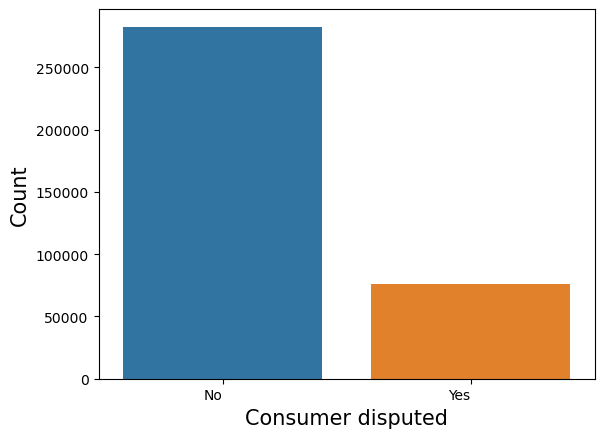

In [31]:
sns.countplot(x = 'Consumer disputed?', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Consumer disputed', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

task10:Plot bar graph of the total no of disputes products-wise

Text(0, 0.5, 'Count')

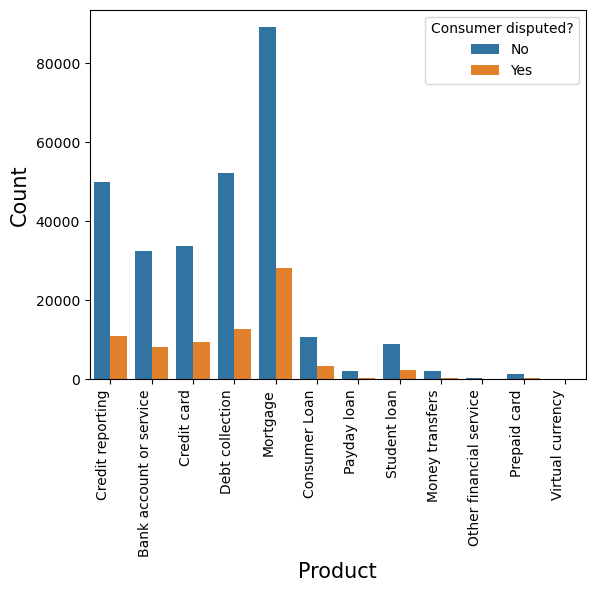

In [32]:
sns.countplot(x = 'Product', hue = 'Consumer disputed?', data = df_train)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

task11:Plot bar graph of the total no of disputes with Top Issues by Highest Disputes

Text(0, 0.5, 'Count')

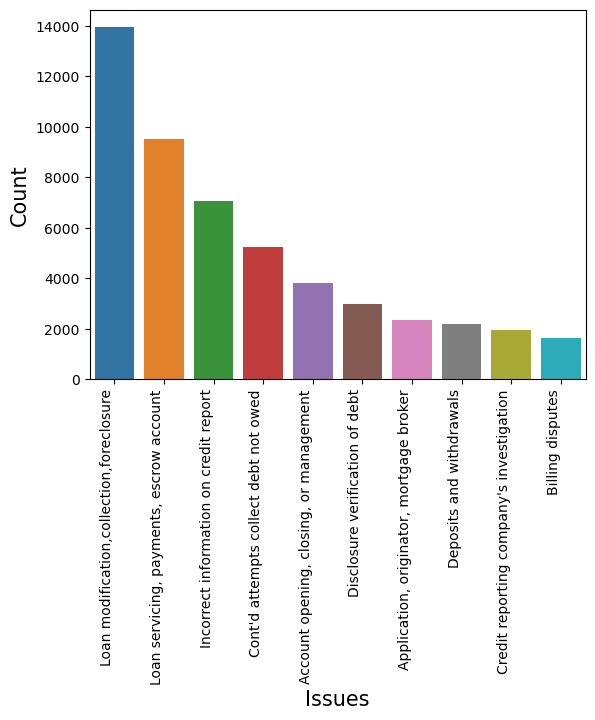

In [33]:
top_issues_disputes = disputed_cons['Issue'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_issues_disputes.index, y = top_issues_disputes.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Issues', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

task12:Plot bar graph of the total no of disputes by State with Maximum Disputes

Text(0, 0.5, 'Count')

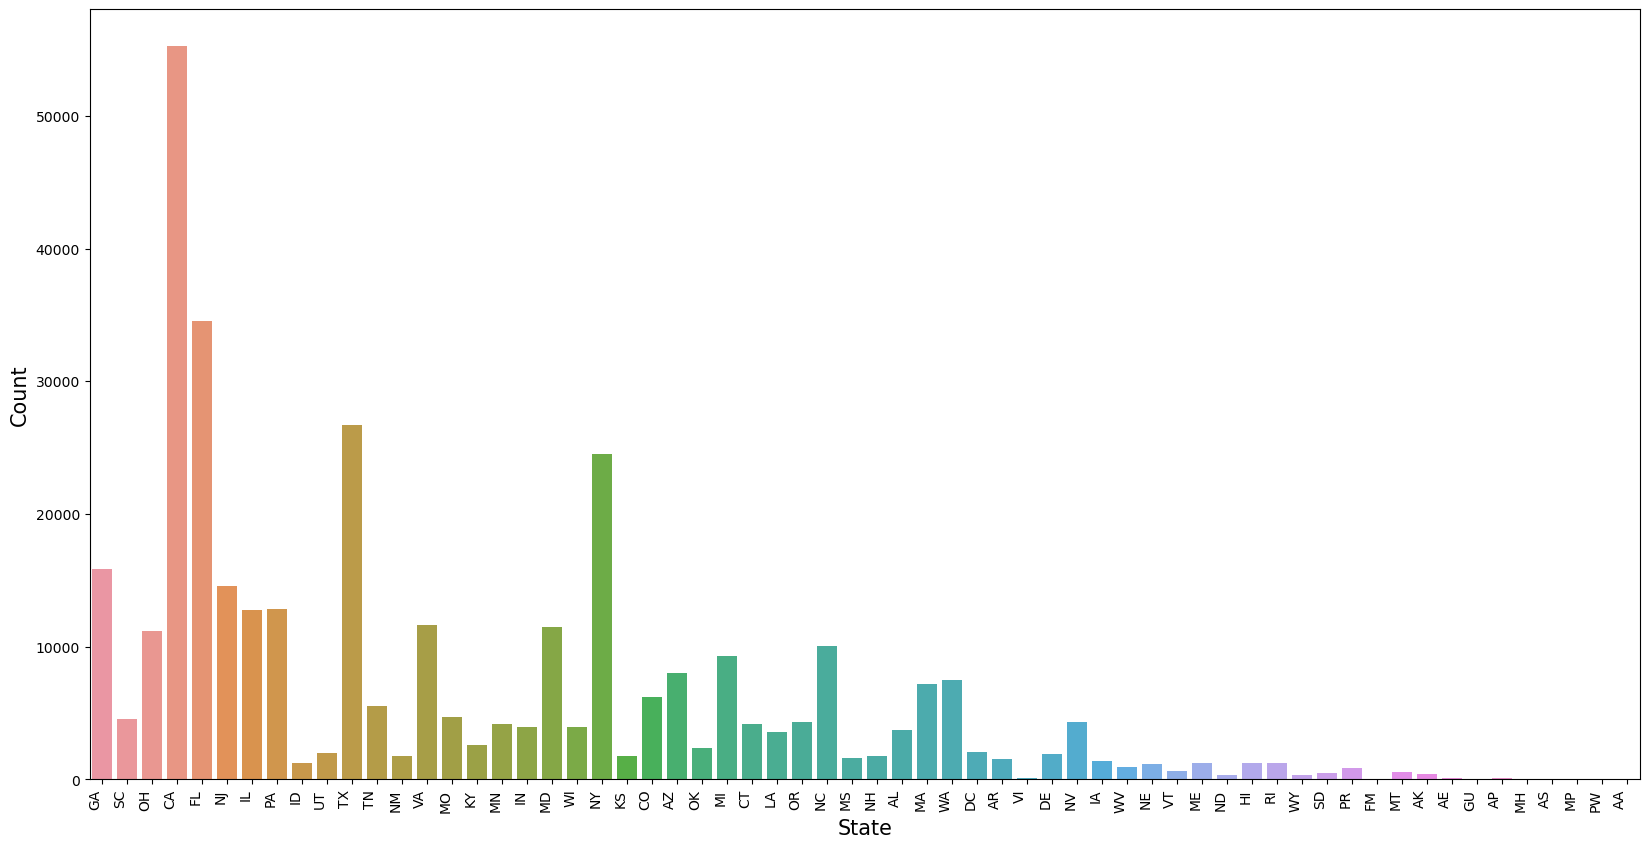

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = df_train['State'])
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

task13:Plot bar graph of the total no of disputes Submitted Via different source

Text(0, 0.5, 'Count')

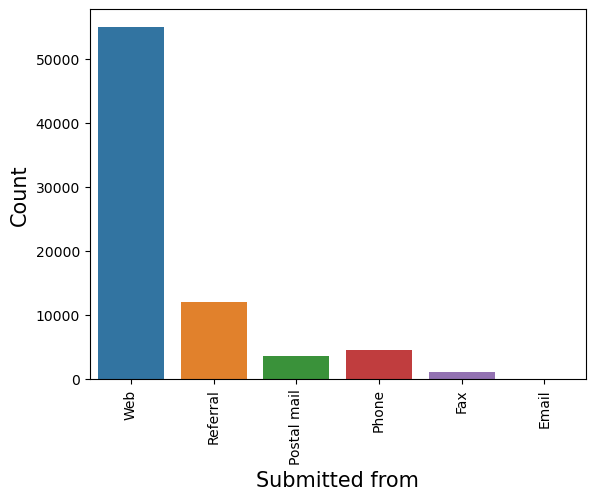

In [35]:
sns.countplot(x = 'Submitted via', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Submitted from', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

task14:Plot bar graph of the total no of disputes where the Company's Response to the Complaints

Text(0, 0.5, 'Count')

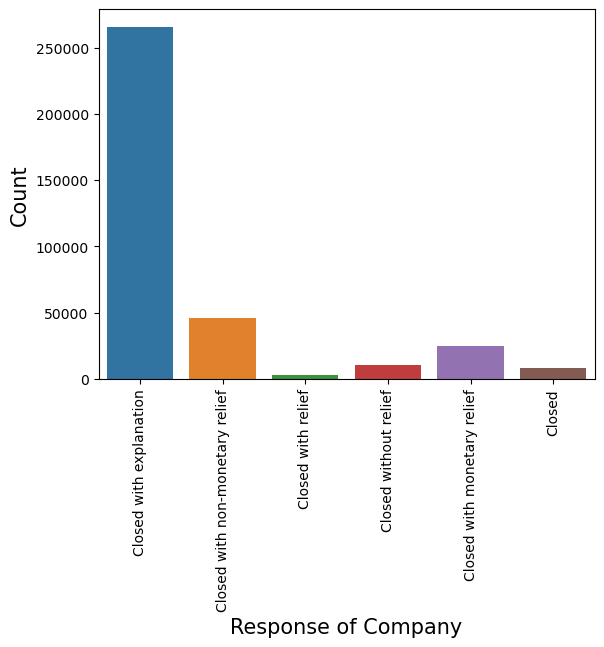

In [36]:
sns.countplot(x = 'Company response to consumer', data = df_train)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

task15:Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes

Text(0, 0.5, 'Count')

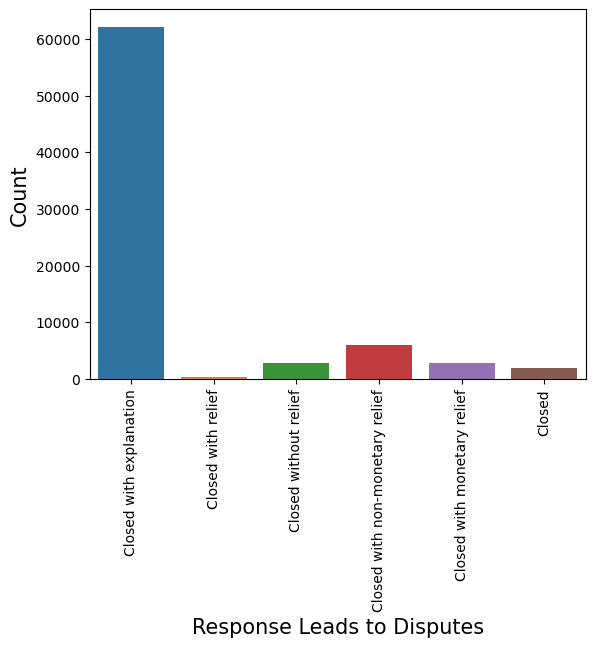

In [37]:
sns.countplot(x = 'Company response to consumer', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response Leads to Disputes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

task16:Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response



Text(0, 0.5, 'Count')

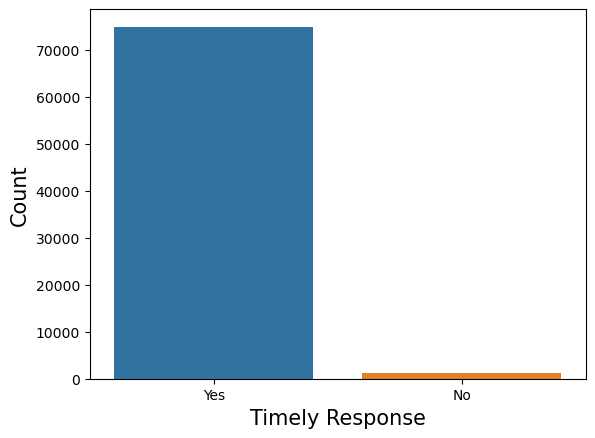

In [38]:
sns.countplot(x = 'Timely response?', data = disputed_cons)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Timely Response', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

task17:Plot bar graph of the total no of disputes over Year Wise Complaints

Text(0, 0.5, 'Count')

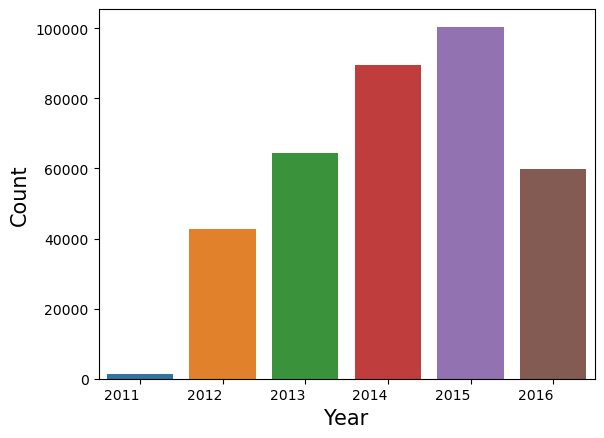

In [39]:
sns.countplot(x = 'Year_Received', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

task18:Plot bar graph of Top Companies with Highest Complaints



Text(0, 0.5, 'Count')

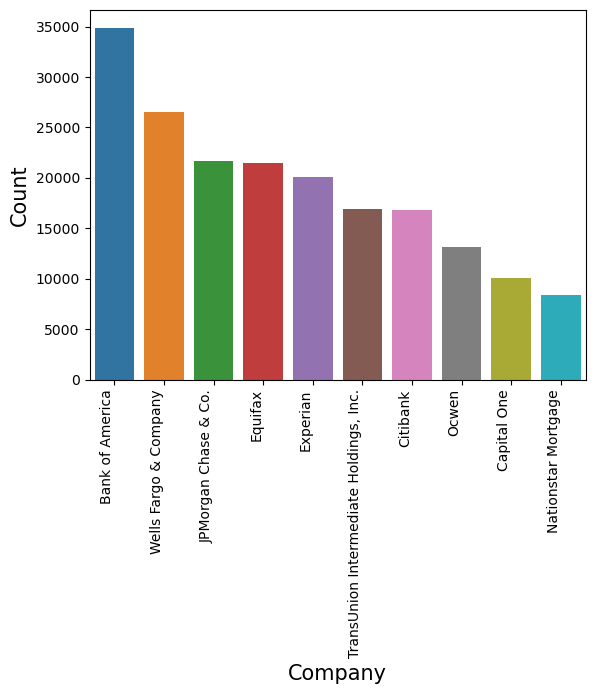

In [40]:
worst_company_complaints = df_train['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = worst_company_complaints.index, y = worst_company_complaints.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

task19:Convert all negative days held to zero (it is the time taken by the authority that can't be negative)

In [41]:
Days_held_train = []
for i in df_train['Days held']:
    if i < 0:
        Days_held_train.append(0)
    else:
        Days_held_train.append(i)
df_train['Days_held'] = Days_held_train
Days_held_test = []
for i in df_test['Days held']:
    if i < 0:
        Days_held_test.append(0)
    else:
        Days_held_test.append(i)
df_test['Days_held'] = Days_held_test

In [42]:
df_train

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Day_Received,Days held,Week_Received,Days_held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0,2,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0,4,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14,3,14
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,-1,2,0
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,4,2,4
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0,1,0
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,4,4,4


In [43]:
df_test

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Day_Received,Days held,Week_Received,Days_held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,17,0,3,0
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,22,0,4,0
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,4,0,1,0
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,17,3,3,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,IL,Web,Closed with explanation,Yes,2015,2,9,0,2,0
119602,Credit card,Balance transfer,Capital One,KS,Web,Closed with explanation,Yes,2012,11,13,1,2,1
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,2012,5,15,0,2,0
119604,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,2015,6,7,0,1,0


task20:Drop Unnecessary Columns for the Model Building like:'Company', 'State', 'Year_Received', 'Days_held'

In [44]:
drop_col = ['Company', 'State', 'Year_Received', 'Days_held']
df_train = df_train.drop(drop_col, axis = 1)
df_test = df_test.drop(drop_col, axis = 1)

In [45]:
df_train

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_Received,Day_Received,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,No,10,14,0,2
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,Yes,4,26,0,4
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,No,12,20,14,3
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,No,3,3,1,1
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,Yes,1,30,0,4
...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Web,Closed with non-monetary relief,Yes,No,4,14,-1,2
358806,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed with non-monetary relief,Yes,No,3,14,4,2
358807,Credit card,Payoff process,Web,Closed,Yes,Yes,2,1,0,1
358808,Debt collection,Cont'd attempts collect debt not owed,Phone,Closed with non-monetary relief,Yes,No,6,25,4,4


In [46]:
df_test

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Month_Received,Day_Received,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Web,Closed with monetary relief,Yes,1,17,0,3
1,Consumer Loan,Payment to acct not credited,Phone,Closed with explanation,Yes,6,22,0,4
2,Credit card,Credit line increase/decrease,Web,Closed with explanation,Yes,9,4,0,1
3,Consumer Loan,Problems when you are unable to pay,Web,Closed with non-monetary relief,Yes,5,17,3,3
4,Debt collection,Improper contact or sharing of info,Web,Closed with explanation,Yes,7,7,0,1
...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Web,Closed with explanation,Yes,2,9,0,2
119602,Credit card,Balance transfer,Web,Closed with explanation,Yes,11,13,1,2
119603,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed without relief,Yes,5,15,0,2
119604,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,6,7,0,1


task21:Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [47]:
df_train['Consumer disputed?'] = np.where(df_train['Consumer disputed?'] == "Yes", 1, 0)

In [48]:
df_train

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_Received,Day_Received,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,0,10,14,0,2
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,1,4,26,0,4
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,0,12,20,14,3
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,0,3,3,1,1
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,1,1,30,0,4
...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Web,Closed with non-monetary relief,Yes,0,4,14,-1,2
358806,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed with non-monetary relief,Yes,0,3,14,4,2
358807,Credit card,Payoff process,Web,Closed,Yes,1,2,1,0,1
358808,Debt collection,Cont'd attempts collect debt not owed,Phone,Closed with non-monetary relief,Yes,0,6,25,4,4


task22:Create Dummy Variables for categorical features and concat with the original data frame like: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'

In [49]:
# Dummy Variables for categorical features 
dum_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
df_train_dummies = pd.get_dummies(df_train[dum_cols], prefix_sep = '_', drop_first = True)
df_test_dummies = pd.get_dummies(df_test[dum_cols], prefix_sep = '_', drop_first = True)

In [50]:
df_train_dummies

,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
358806,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
358807,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
358808,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [51]:
df_test_dummies

,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
119602,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
119603,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
119604,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [52]:
#concat with the original data frame 
df_train = df_train.drop(dum_cols, axis = 1)
df_test = df_test.drop(dum_cols, axis = 1)
df_train = pd.concat([df_train, df_train_dummies], axis = 1)
df_test = pd.concat([df_test, df_test_dummies], axis = 1)

In [53]:
df_test

,Issue,Month_Received,Day_Received,Days held,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,Customer service / Customer relations,1,17,0,3,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,Payment to acct not credited,6,22,0,4,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,Credit line increase/decrease,9,4,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,Problems when you are unable to pay,5,17,3,3,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,Improper contact or sharing of info,7,7,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit determination,2,9,0,2,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
119602,Balance transfer,11,13,1,2,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
119603,"Loan modification,collection,foreclosure",5,15,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
119604,Incorrect information on credit report,6,7,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [54]:
df_train

,Issue,Consumer disputed?,Month_Received,Day_Received,Days held,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,Incorrect information on credit report,0,10,14,0,2,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,Deposits and withdrawals,1,4,26,0,4,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,Other,0,12,20,14,3,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
3,Disclosure verification of debt,0,3,3,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
4,Disclosure verification of debt,1,1,30,0,4,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Incorrect information on credit report,0,4,14,-1,2,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
358806,"Loan modification,collection,foreclosure",0,3,14,4,2,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
358807,Payoff process,1,2,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
358808,Cont'd attempts collect debt not owed,0,6,25,4,4,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


task23:Scaling the Data Sets (note: discard dependent variable before doing standardization) and Make feature Selection with the help of PCA up to 80% of the information.

In [55]:
# separate the dependent variable (target) from the independentvariable (features)
X = df_train.drop(columns=['Consumer disputed?'])#independent variable
y = df_train['Consumer disputed?']#dependent variable

In [56]:
X

,Issue,Month_Received,Day_Received,Days held,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,Incorrect information on credit report,10,14,0,2,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1,Deposits and withdrawals,4,26,0,4,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,Other,12,20,14,3,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,Disclosure verification of debt,3,3,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
4,Disclosure verification of debt,1,30,0,4,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Incorrect information on credit report,4,14,-1,2,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
358806,"Loan modification,collection,foreclosure",3,14,4,2,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
358807,Payoff process,2,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
358808,Cont'd attempts collect debt not owed,6,25,4,4,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [57]:
y

0         0
1         1
2         0
3         0
4         1
         ..
358805    0
358806    0
358807    1
358808    0
358809    0
Name: Consumer disputed?, Length: 358810, dtype: int32

In [58]:
#label encode the 'issue' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Issue'] = label_encoder.fit_transform(X['Issue'])

In [59]:
# standardize the independent variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
#perform pca to reduce dimensionality while retaining 80% of the information
pca= PCA(n_components=0.8)#retain 80%of information
X_pca = pca.fit_transform(X_scaled)

In [61]:
print("number of principal components selected:",pca.n_components_)
X_pca_df =pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
X_pca_df['consumer disputed?'] = y.reset_index(drop=True)

number of principal components selected: 17


In [62]:
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,consumer disputed?
0,-0.902939,0.287338,-1.186882,1.271812,0.322107,-0.977652,-0.564938,-0.485110,-0.325204,-0.439786,0.152724,-0.251420,0.263351,0.130802,0.039021,-0.062327,0.131771,0
1,-0.471612,-1.884029,-0.502878,-0.274420,-0.374079,-0.077395,-0.444162,0.391691,-0.031830,-0.063291,0.024241,-0.068683,-0.066060,0.001680,-0.038648,-0.042250,0.172801,1
2,-0.570501,0.132643,3.155164,-0.205995,1.202782,-1.052887,2.180686,0.478871,-1.016626,-0.843517,0.655118,-0.149288,0.225847,-0.162981,0.076903,0.151752,1.275166,0
3,1.021226,1.844100,-0.447859,-1.360368,1.490097,1.319098,-0.032350,-0.530779,0.714639,-0.759520,-0.953348,-0.107882,-0.038090,-0.014418,-0.260849,0.032605,-0.224477,0
4,-1.097061,-2.357126,-0.791910,-0.979245,0.341145,1.145713,-0.046014,0.614464,0.426990,-0.039803,-0.069239,-0.077935,-0.595762,-0.066198,-0.045515,-0.099112,0.170570,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,-2.372243,0.848609,1.208315,2.673627,0.300192,0.650078,-0.099767,0.138847,-0.435845,-0.590719,0.126033,-0.095383,0.453411,0.118227,-0.293668,0.056944,0.220589,0
358806,1.318069,1.070870,2.431718,1.481967,-0.079576,2.003259,0.312436,-0.756248,-0.165129,-0.708041,-0.328652,-0.150426,0.506075,0.069102,-0.493703,0.182000,-0.101377,0
358807,-1.085892,2.413782,0.614734,-0.317223,-1.454779,-0.765274,-0.661157,0.875618,0.537118,-0.025839,0.581934,-0.075902,-0.422402,0.009355,0.176731,-0.154144,0.151192,1
358808,-1.276727,-1.201965,2.404019,-0.810510,2.658831,1.592997,2.861936,0.837708,-1.162520,-0.845228,0.017019,-0.064892,0.084379,-0.223333,-0.181569,0.171783,1.366607,0


task24:Splitting the Data Sets Into X and Y by the dependent and independent variables (data 
selected by PCA)

In [63]:
X = X_pca_df
y = df_train['Consumer disputed?']

In [64]:
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

task25:Build given models and measure their test and validation accuracy:
o LogisticRegression
o DecisionTreeClassifier
o RandomForestClassifier
o AdaBoostClassifier
o GradientBoostingClassifier
o KNeighborsClassifier
o XGBClassifier

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Decision Tree(CART)', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM',  SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

for name, model in models:
    model=model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    from sklearn import metrics
    
    print("%s -> ACC: %%%.2f" % (name,metrics.accuracy_score(y_test,y_pred)*100))

LogisticRegression -> ACC: %100.00
Decision Tree(CART) -> ACC: %100.00
Naive Bayes -> ACC: %100.00
K-NN -> ACC: %99.49
SVM -> ACC: %99.98
RandomForestClassifier -> ACC: %100.00


In [67]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test = X_pca_df

In [68]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)

,Modelling Algorithm,Train Accuracy,Validation Accuracy,Difference
0,LogisticRegression,1.000000,1.000000,0.00000
1,DecisionTreeClassifier,1.000000,1.000000,0.00000
2,RandomForestClassifier,1.000000,1.000000,0.00000
3,AdaBoostClassifier,1.000000,1.000000,0.00000
4,GradientBoostingClassifier,1.000000,1.000000,0.00000
6,XGBClassifier,1.000000,1.000000,0.00000
5,KNeighborsClassifier,0.996743,0.994956,0.17935


task26:Whoever gives the most accurate result uses it and predicts the outcome for the test file 
and fills its dispute column so the business team can take some action accordingly.


final model and predection for test data set

In [69]:
lr = LogisticRegression()#logistic regression
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Prediction'])
y_pred_test

,Prediction
0,0
1,1
2,0
3,0
4,1
...,...
358805,0
358806,0
358807,1
358808,0


exporting the preduction to csv

In [70]:
y_pred_test.to_csv('Prediction.csv')